<a href="https://colab.research.google.com/github/YinmiAlas/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df2 = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df2.shape)
df2.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [3]:
df = df2.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
#dropping the last column its has NaN values
df = df.drop(['Unnamed: 32'], axis=1)

In [5]:
df.sum()

id                         1.728157e+10
radius_mean                8.038429e+03
texture_mean               1.097581e+04
perimeter_mean             5.233038e+04
area_mean                  3.726319e+05
smoothness_mean            5.482900e+01
compactness_mean           5.937002e+01
concavity_mean             5.052681e+01
concave points_mean        2.783499e+01
symmetry_mean              1.030811e+02
fractal_dimension_mean     3.573184e+01
radius_se                  2.305429e+02
texture_se                 6.923896e+02
perimeter_se               1.630788e+03
area_se                    2.295180e+04
smoothness_se              4.006317e+00
compactness_se             1.449706e+01
concavity_se               1.814752e+01
concave points_se          6.712002e+00
symmetry_se                1.168857e+01
fractal_dimension_se       2.159300e+00
radius_worst               9.257169e+03
texture_worst              1.461034e+04
perimeter_worst            6.103163e+04
area_worst                 5.010518e+05


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [6]:
#choosing the specific column 
df1 = pd.DataFrame(dict(x=df['radius_mean'], y=df['area_mean']))
df1

,x,y
0,17.99,1001.0
1,20.57,1326.0
2,19.69,1203.0
3,11.42,386.1
4,20.29,1297.0
...,...,...
564,21.56,1479.0
565,20.13,1261.0
566,16.60,858.1
567,20.60,1265.0


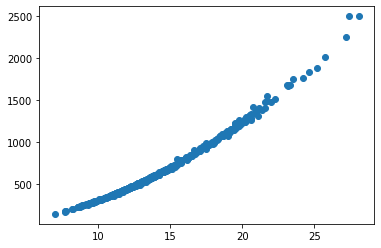

In [7]:
#visualize those columns
plt.scatter(x=df1['x'], y=df1['y']);

In [0]:
#using elbow mode
#lets see how many clusters i can apply  for this data
squared_of_distances = []
K = range(1,10)
for k in K:
  k_means = KMeans(n_clusters=k)
  k_means.fit(df1)
  squared_of_distances.append(k_means.inertia_)                           

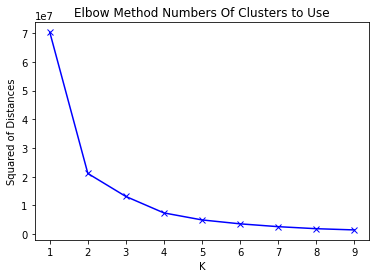

In [9]:
#visualizing the clusters that i need
plt.plot(K, squared_of_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Squared of Distances')
plt.title('Elbow Method Numbers Of Clusters to Use')
plt.show()

In [0]:
# Perform K-Means Clustering on the Dataset
#having the visualizition i know that i need 4 clusters
# now i'm applying the four clusters to the data
k_means2 = KMeans(n_clusters=4)

In [11]:
#lets fit the data
k_means2.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
#checking out every cluster
labels = k_means2.labels_
labels

array([1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0,
       0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 3, 1, 2, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 3, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 3, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 3, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1,
       1, 0, 2, 1, 3, 0, 2, 0, 2, 1, 0, 0, 1, 2, 3, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 3, 1, 0, 1, 0, 2,
       2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1,

In [13]:
#adding the cluster column to the table data 
clusters = pd.Series(labels)
df1['clusters'] = clusters.values
df1.head()

,x,y,clusters
0,17.99,1001.0,1
1,20.57,1326.0,1
2,19.69,1203.0,1
3,11.42,386.1,2
4,20.29,1297.0,1


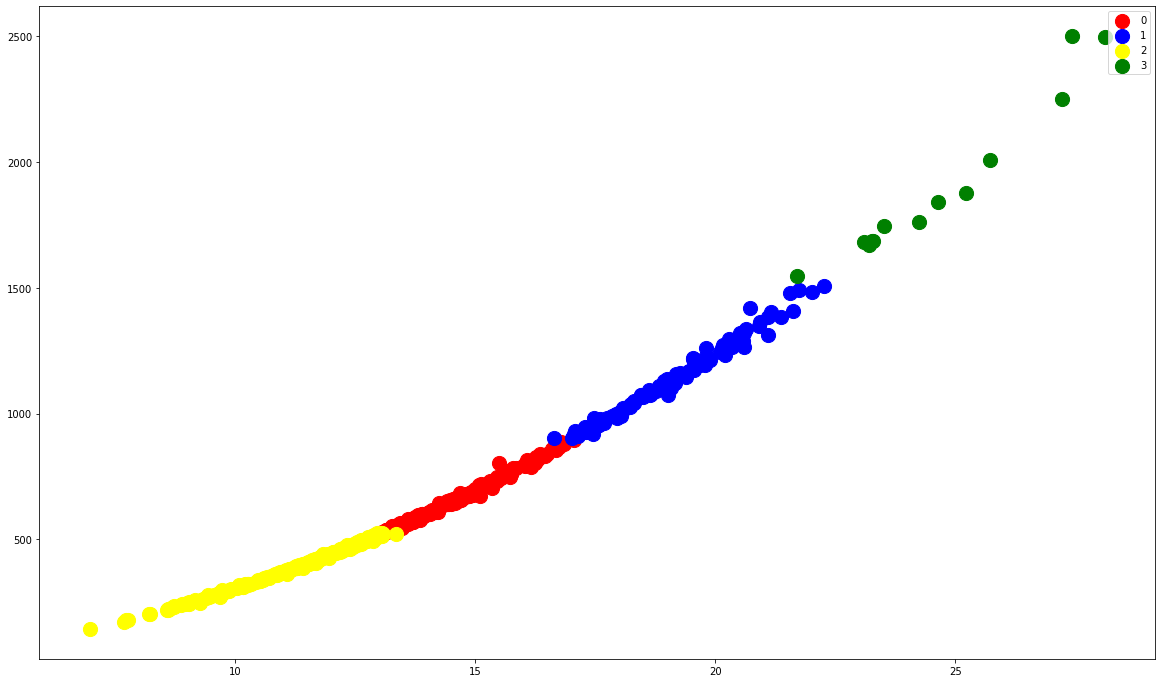

In [14]:
#plotting the data to see every cluster with the data 
plt.figure(figsize=(20,12))
for label1, color1 in [(0, 'red'), (1, 'blue'), (2, 'yellow'), (3, 'green')]:
  clusters = df1[df1['clusters']==label1]
  plt.scatter(x=clusters['x'], y=clusters['y'],
              s=200,
              color=color1,
              label=label1);
plt.legend();

In [0]:
#lets make new centroids 
#this line of code is how you make new ones
def get_centroids(df1, column_header):
    new_centroids = df1.groupby(column_header).mean()
    return new_centroids

In [16]:
#verifying if the centriods change 
#now i have new centroids comparing with the data below 
new_centroids1 = get_centroids(df1, 'clusters')
new_centroids1

,x,y
clusters,,
0,14.545668,656.804813
1,19.175865,1147.866346
2,11.333732,398.774717
3,24.666154,1904.307692


In [17]:
df1.head()

,x,y,clusters
0,17.99,1001.0,1
1,20.57,1326.0,1
2,19.69,1203.0,1
3,11.42,386.1,2
4,20.29,1297.0,1


## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [18]:
df2['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [19]:
# Your Code Here
#adding the diagnosis column and same time comparing with the clusters
newdf = pd.Series(df2['diagnosis'])
df1['diagnosis'] = newdf.values
df1.head()

,x,y,clusters,diagnosis
0,17.99,1001.0,1,M
1,20.57,1326.0,1,M
2,19.69,1203.0,1,M
3,11.42,386.1,2,M
4,20.29,1297.0,1,M


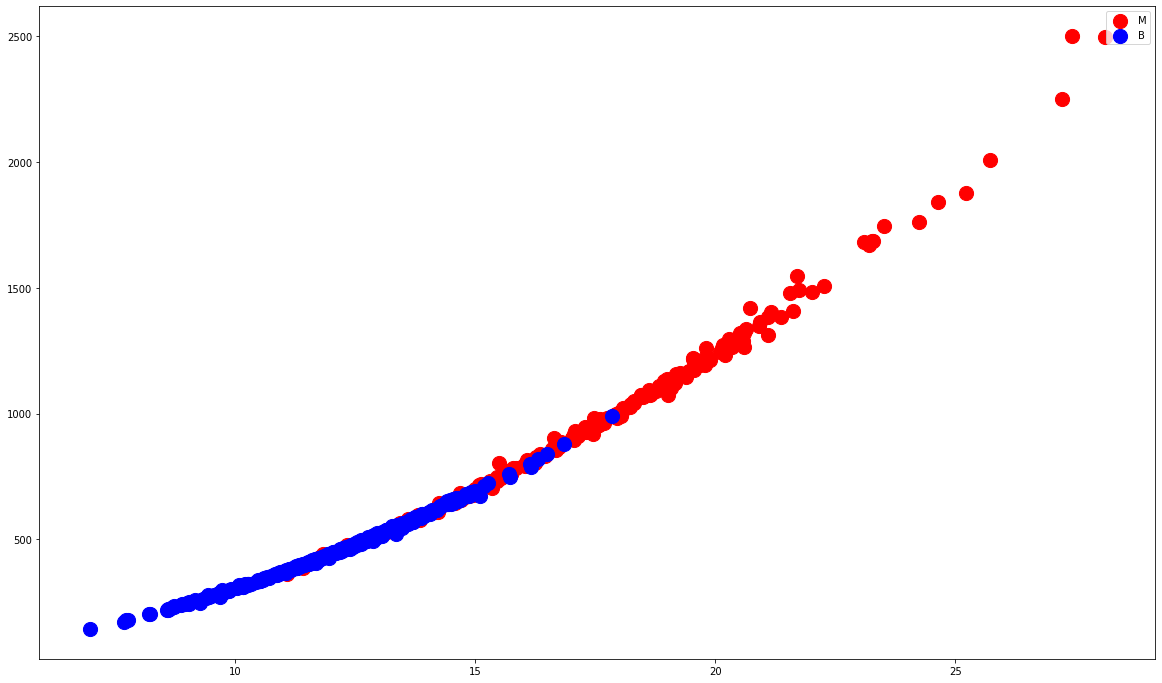

In [20]:
#visualizing the data with the diagnosis values
#i see it has just 2 clusters with diagnosis label
plt.figure(figsize=(20,12))
for label2, color2 in [('M', 'red'), ('B', 'blue')]:
  clusters1 = df1[df1['diagnosis']==label2]
  plt.scatter(x=clusters1['x'], y=clusters1['y'],
              s=200,
              color=color2,
              label=label2);
plt.legend();

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
scaler_data = scaler.fit_transform(df)
scaler_data

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [23]:
df_scaler_data = pd.DataFrame(scaler_data)
df_scaler_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,-0.235730,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,-0.235727,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,-0.235725,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [24]:
df_scaler_data.mean()

0     8.877882e-18
1    -1.256562e-16
2     1.049736e-16
3    -1.272171e-16
4    -1.900452e-16
5     1.490704e-16
6     2.544342e-16
7    -1.338511e-16
8    -8.429110e-17
9     2.081912e-16
10    5.408679e-16
11    2.475807e-16
12   -9.912009e-17
13   -2.968237e-16
14   -1.088760e-16
15    4.426014e-16
16    1.958988e-16
17    1.678017e-16
18    2.185325e-17
19    1.523874e-16
20   -5.658430e-17
21   -7.988142e-16
22   -1.834112e-17
23   -4.015534e-16
24   -2.848727e-17
25   -2.189227e-16
26   -2.579464e-16
27    1.143393e-16
28    2.829215e-16
29    1.670212e-16
30    2.321908e-16
dtype: float64

In [25]:
df_scaler_data.std()

0     1.00088
1     1.00088
2     1.00088
3     1.00088
4     1.00088
5     1.00088
6     1.00088
7     1.00088
8     1.00088
9     1.00088
10    1.00088
11    1.00088
12    1.00088
13    1.00088
14    1.00088
15    1.00088
16    1.00088
17    1.00088
18    1.00088
19    1.00088
20    1.00088
21    1.00088
22    1.00088
23    1.00088
24    1.00088
25    1.00088
26    1.00088
27    1.00088
28    1.00088
29    1.00088
30    1.00088
dtype: float64

In [0]:
from sklearn.decomposition import  PCA
pca = PCA(n_components=7)

In [27]:
pca_df_scaler_data = pca.fit_transform(scaler_data)
pca_df_scaler_data

array([[ 9.18319983,  1.97127138, -1.17162457, ..., -1.19309652,
        -1.37228154,  0.37184805],
       [ 2.38329766, -3.75345878, -0.58022873, ...,  0.6248492 ,
        -0.12661575, -0.28827248],
       [ 5.74247239, -1.08035048, -0.53308795, ..., -0.18060271,
        -0.40185315,  0.46318603],
       ...,
       [ 1.2518901 , -1.89397674,  0.53446685, ...,  1.81482869,
         0.39471326, -0.43780602],
       [10.36503528,  1.69639756, -1.90741775, ..., -0.028218  ,
        -0.65672069, -0.19526062],
       [-5.47826365, -0.67278803,  1.47716508, ..., -0.17687396,
        -1.57207722,  0.60034067]])

In [28]:
print(pca.explained_variance_ratio_) # how much variation did each principal component explain?
print(sum(pca.explained_variance_ratio_)) # How much total variance did we explain?
print(1-sum(pca.explained_variance_ratio_)) # How much information did we lose?

[0.42864701 0.18376792 0.09146436 0.06391475 0.05318759 0.03982815
 0.0315572 ]
0.8923669760940737
0.10763302390592633


In [29]:
pca_data = pd.DataFrame(pca_df_scaler_data, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7'])
pca_data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,9.183200,1.971271,-1.171625,3.639331,-1.193097,-1.372282,0.371848
1,2.383298,-3.753459,-0.580229,1.127438,0.624849,-0.126616,-0.288272
2,5.742472,-1.080350,-0.533088,0.903471,-0.180603,-0.401853,0.463186
3,7.124384,10.272225,-3.150161,0.121512,-2.968056,-2.561666,1.950177
4,3.945694,-1.959689,1.401177,2.937555,0.540854,1.233299,-0.205434
...,...,...,...,...,...,...,...
564,6.435329,-3.565358,2.399111,1.197814,-0.071090,2.028791,-1.345195
565,3.789458,-3.573419,2.029505,-2.478688,-0.498521,-0.080421,-1.024111
566,1.251890,-1.893977,0.534467,-2.077633,1.814829,0.394713,-0.437806
567,10.365035,1.696398,-1.907418,-2.351808,-0.028218,-0.656721,-0.195261


In [0]:
k = 2
model = KMeans(n_clusters=k, max_iter=1)

In [31]:
model.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
pca_data['clusters3'] = model.labels_

In [0]:
centroids4 = model.cluster_centers_

In [34]:
cent = pd.DataFrame(centroids4)
cent.head()

,0,1,2,3,4,5,6
0,-2.296593,0.073725,0.121822,0.076676,-0.005842,0.036585,0.001949
1,4.109100,-0.131910,-0.217965,-0.137190,0.010453,-0.065459,-0.003486


In [0]:
b_color = ['red', 'blue']
color = [b_color[centroids4] for centroids4 in model.labels_]

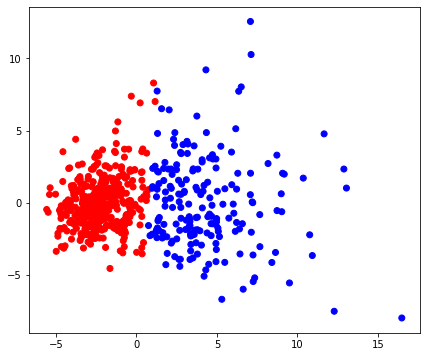

In [36]:
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(pca_data['pc1'], pca_data['pc2'], c=color)
plt.show();

In [37]:
#make scree plot
# Plot the variance explained by each component.
number_components = len(pca.explained_variance_ratio_)
number_components

7

In [38]:
index = np.arange(number_components)
index

array([0, 1, 2, 3, 4, 5, 6])

In [39]:
values = pca.explained_variance_ratio_
values

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759,
       0.03982815, 0.0315572 ])

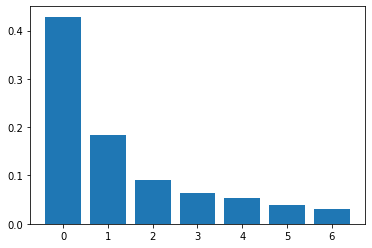

In [40]:
plt.bar(index, values);

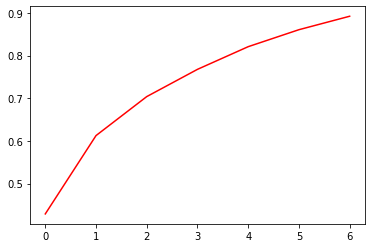

In [41]:
# Plot the cumulative variance explained by all the components.
index = np.arange(number_components)
values = pca.explained_variance_ratio_
cumulative_values = np.cumsum(values)
plt.plot(index, cumulative_values, c='r');

In [0]:
# Define scree plot function
def scree_plot(pca):

    number_components=len(pca.explained_variance_ratio_)
    index = np.arange(number_components)
    values = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumulative_values = np.cumsum(values)
    ax.bar(index, values)
    ax.plot(index, cumulative_values, c='r')
    for i in range(number_components):
        ax.annotate(r"%s" % ((str(values[i]*100)[:8])), (index[i], values[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
plt.show()

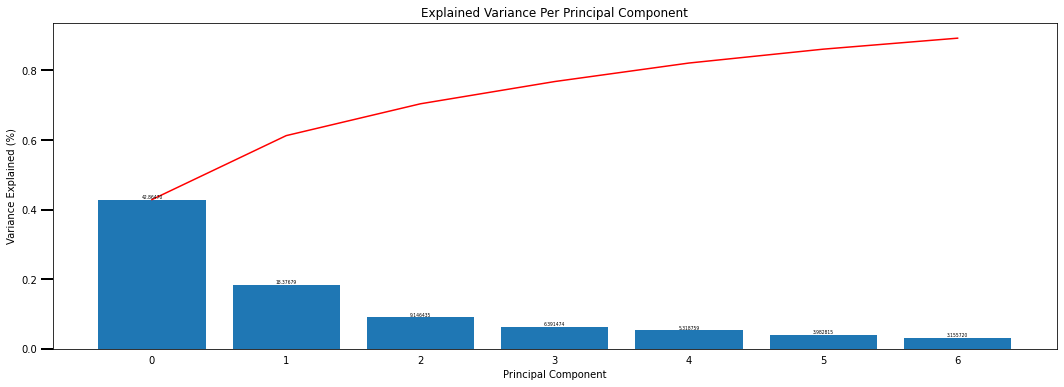

In [45]:
# Apply the plot function to our principle component
scree_plot(pca)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

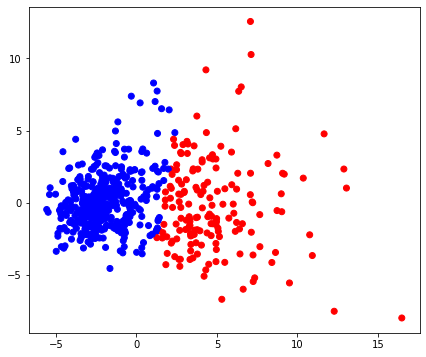

In [69]:
#PC1 and PC2
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(pca_data['pc1'], pca_data['pc2'], c=color)
plt.show();

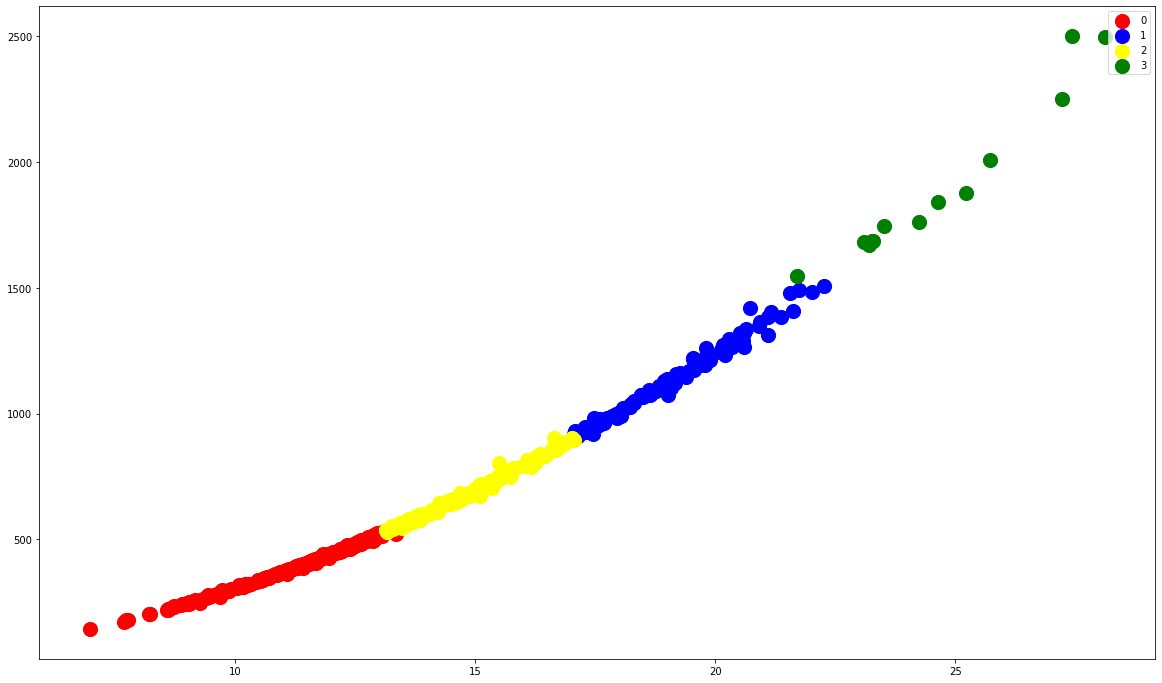

In [70]:
#scatter plot of the raw data
plt.figure(figsize=(20,12))
for label1, color1 in [(0, 'red'), (1, 'blue'), (2, 'yellow'), (3, 'green')]:
  clusters = df1[df1['clusters']==label1]
  plt.scatter(x=clusters['x'], y=clusters['y'],
              s=200,
              color=color1,
              label=label1);
plt.legend();

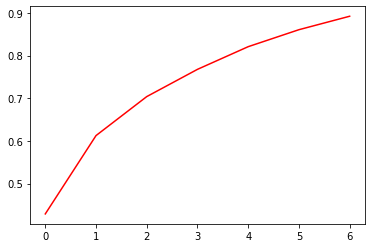

In [46]:
# this is how a calculate the 90% of my data and how many components i need
# Plot the cumulative variance explained by all the components.
index = np.arange(number_components)
values = pca.explained_variance_ratio_
cumulative_values = np.cumsum(values)
plt.plot(index, cumulative_values, c='r');

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project